# Spam SMS Detection

In [ ]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

## 1. Data Preparation

In [ ]:
df = pd.read_csv(r"/content/spam_dataset.csv",encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
  #Dropping unnecessary columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import numpy as np
df['Count']=0
for i in np.arange(0,len(df.v2)):
    df.loc[i,'Count'] = len(df.loc[i,'v2'])

In [ ]:
df.head()

,v1,v2,Count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.tail()

,v1,v2,Count
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125
5571,ham,Rofl. Its true to its name,26


In [ ]:
# Total ham(0) and spam(1) messages
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
 2   Count   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [ ]:
corpus = []
ps = PorterStemmer()

In [ ]:
# Original Messages

print (df['v2'][2])
print (df['v2'][3])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...


## 2. Exploratory Data Analysis

In [ ]:
df.groupby('v1').describe()

Count                                                         
       count        mean        std   min    25%    50%    75%    max
v1                                                                   
ham   4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam   747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [ ]:
#Replacing column names
df.rename(columns={'v1':'label','v2':'sms'},inplace=True)

In [ ]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
df.sms.value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [ ]:
df.groupby('sms').describe()

Count                    \
                                                   count   mean std    min   
sms                                                                          
 &lt;#&gt;  in mca. But not conform.                 1.0   36.0 NaN   36.0   
 &lt;#&gt;  mins but i had to stop somewhere fi...   1.0   51.0 NaN   51.0   
 &lt;DECIMAL&gt; m but its not a common car her...   1.0  132.0 NaN  132.0   
 and  picking them up from various points            1.0   41.0 NaN   41.0   
 came to look at the flat, seems ok, in his 50s...   1.0  103.0 NaN  103.0   
...                                                  ...    ...  ..    ...   
ÌÏ still got lessons?  ÌÏ in sch?                    1.0   33.0 NaN   33.0   
ÌÏ takin linear algebra today?                       1.0   30.0 NaN   30.0   
ÌÏ thk of wat to eat tonight.                        1.0   29.0 NaN   29.0   
ÌÏ v ma fan...                                       1.0   14.0 NaN   14.0   
ÌÏ wait 4 me in sch i finish ard 5..                 1.0   36.0 NaN   36.0   

                                                                                
                                                      25%    50%    75%    max  
sms                                                                             
 &lt;#&gt;  in mca. But not conform.                 36.0   36.0   36.0   36.0  
 &lt;#&gt;  mins but i had to stop somewhere fi...   51.0   51.0   51.0   51.0  
 &lt;DECIMAL&gt; m but its not a common car her...  132.0  132.0  132.0  132.0  
 and  picking them up from various points            41.0   41.0   41.0   41.0  
 came to look at the flat, seems ok, in his 50s...  103.0  103.0  103.0  103.0  
...                                                   ...    ...    ...    ...  
ÌÏ still got lessons?  ÌÏ in sch?                    33.0   33.0   33.0   33.0  
ÌÏ takin linear algebra today?                       30.0   30.0   30.0   30.0  
ÌÏ thk of wat to eat tonight.                        29.0   29.0   29.0   29.0  
ÌÏ v ma fan...                                       14.0   14.0   14.0   14.0  
ÌÏ wait 4 me in sch i finish ard 5..                 36.0   36.0   36.0   36.0  

[5169 rows x 8 columns]

In [ ]:
df.groupby('label').describe()

Count                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

### Inference
We can see the top msgs in ham and spam. Please call our customer service rep seems to be the most common spam message.

In [ ]:
#Replacing column names
df.rename(columns={'v1':'label','v2':'sms'},inplace=True)

In [ ]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:

df['sms length'] = df['sms'].apply(len)
df.head()

,label,sms,Count,sms length
0,ham,"Go until jurong point, crazy.. Available only ...",111,111
1,ham,Ok lar... Joking wif u oni...,29,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,ham,U dun say so early hor... U c already then say...,49,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,61


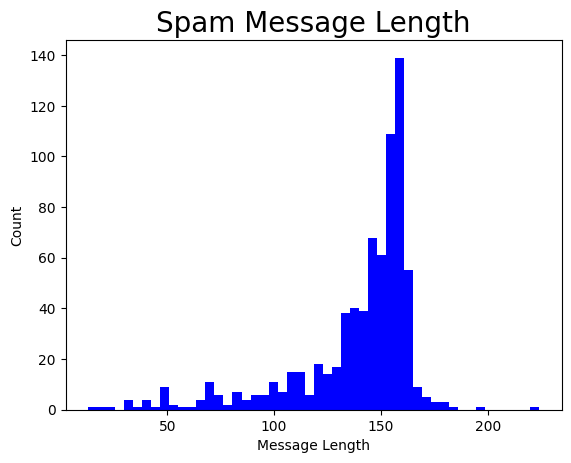

In [ ]:

# Plotting length of sms text for spam sms
plt.hist(df[df['label']=='spam']['sms length'],color='blue',bins=50)
plt.title('Spam Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

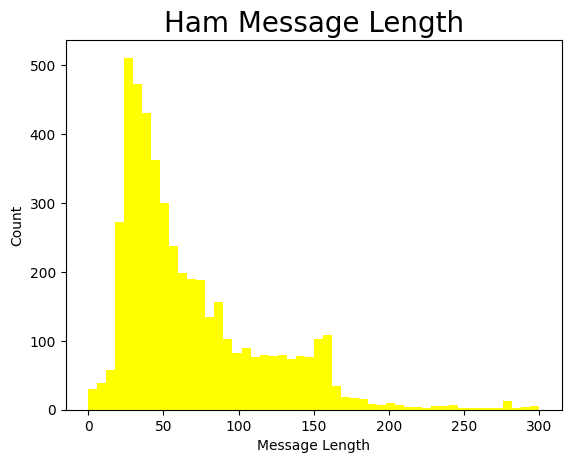

In [ ]:
# Plotting length of sms text for spam sms
plt.hist(df[df['label']=='ham']['sms length'],color='yellow',bins=50,range=(0,300))
plt.title('Ham Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

### Inference
We can see that sms with longer text tend to be spam.

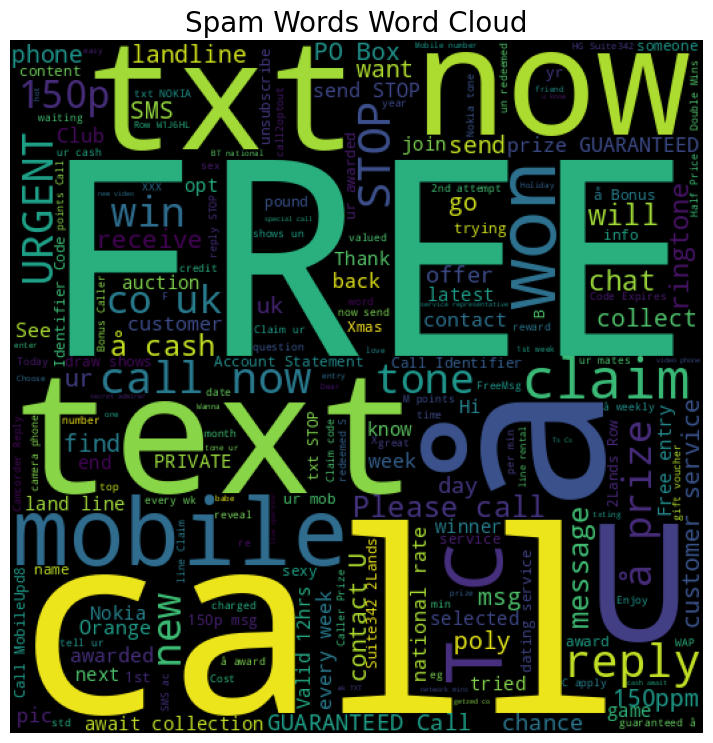

In [ ]:
spam_words = ' '.join(list(df[df['label'] == 'spam']['sms']))
spam_wc = WordCloud(width=520,height=520).generate(spam_words)
plt.figure(figsize=(16,9))
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Spam Words Word Cloud",fontsize=20)
plt.show()

### Inference
We can see that sms containing words FREE,Please Call, Now , Win,Text,Call tend to be very common spam words

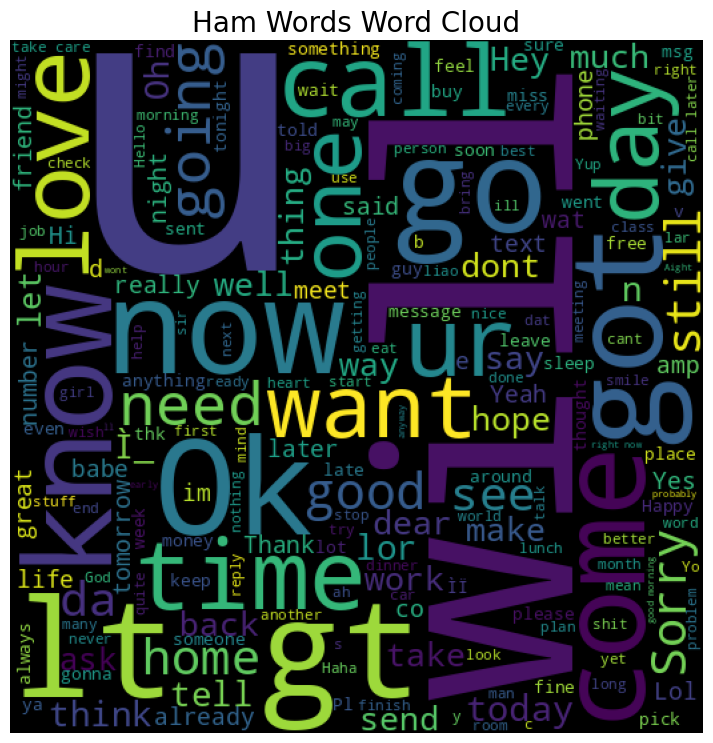

In [ ]:
ham_words = ' '.join(list(df[df['label'] == 'ham']['sms']))
ham_wc = WordCloud(width=520,height=520).generate(ham_words)
plt.figure(figsize=(16,9))
plt.imshow(ham_wc)
plt.axis("off")
plt.title("Ham Words Word Cloud",fontsize=20)
plt.show()

### Inference
We can see the most common ham sms contain words will, know, gt (got), OK, know, Love,now.

# 3.Text Preprocessing

In [ ]:
#Processing Text - removing stopwords, punctuation and apply stemming
import string
ps = PorterStemmer()

def process_sms(sms):
    ''' This function removes punctuations and returns the sms as a list of words'''
    sms = sms.translate(str.maketrans('','',string.punctuation)) #remove punctuations
    sms = sms.split()
    sms = [ps.stem(word) for word in sms if len(word) > 2]
    sms = ' '.join(sms)
    return sms

In [ ]:
df['sms'] = df.sms.apply(process_sms) #took about 2 mins to execute

In [ ]:
# convert label to a numerical variable
df['label'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,sms,Count,sms length
0,0,until jurong point crazi avail onli bugi great...,111,111
1,0,lar joke wif oni,29,29
2,1,free entri wkli comp win cup final tkt 21st ma...,155,155
3,0,dun say earli hor alreadi then say,49,49
4,0,nah dont think goe usf live around here though,61,61


In [ ]:
#Dropping unnecessary columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df.head()

,label,sms,Count,sms length
0,0,until jurong point crazi avail onli bugi great...,111,111
1,0,lar joke wif oni,29,29
2,1,free entri wkli comp win cup final tkt 21st ma...,155,155
3,0,dun say earli hor alreadi then say,49,49
4,0,nah dont think goe usf live around here though,61,61


## Using TF-IDF


Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining.TF means Term Frequency. It measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length as a way of normalization.

TF = (Number of times term w appears in a document) / (Total number of terms in the document)

Second part idf stands for Inverse Document Frequency. It measures how important a term is. While computing TF, all terms are equally important.

IDF = log_e(Total number of documents / Number of documents with term w in it)


In [ ]:
tfidf = TfidfVectorizer(encoding='latin-1',stop_words='english',analyzer='word',lowercase=True,smooth_idf=True)

In [ ]:
#Splitting into train test set
X_train,X_test,y_train,y_test = train_test_split(df['sms'],df['label'],test_size = 0.30, random_state =7)

In [ ]:
features_train = tfidf.fit_transform(X_train)
features_test = tfidf.transform(X_test)
print(type(features_train))
df_train = pd.DataFrame(features_train.todense(), columns=tfidf.get_feature_names_out())

<class 'scipy.sparse._csr.csr_matrix'>


# 4. Model Building

## Naive Bayes

Generally, Naive Bayes works well on text data.

Multinomial Naive Bayes calculates likelihood to be count of an word/token (random variable) unlike Gaussian Naive Bayes and hence I would use Multinomial Naive Bayes model.

In [ ]:
model = MultinomialNB()
model.fit(features_train,y_train)

MultinomialNB()

In [ ]:

prediction = model.predict(features_test)
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

0.9521531100478469
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1444
           1       1.00      0.65      0.79       228

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.88      1672
weighted avg       0.95      0.95      0.95      1672



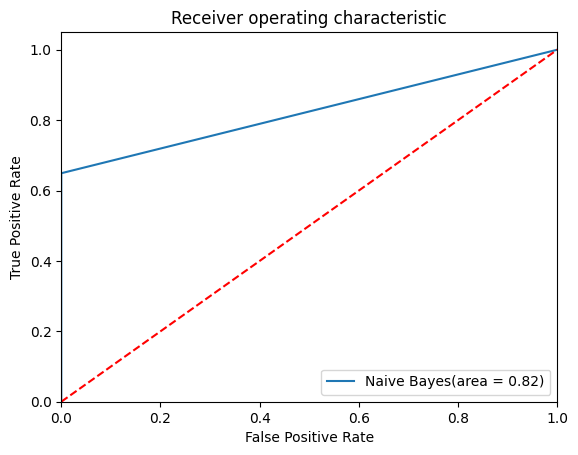

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

nb_roc_auc = roc_auc_score(y_test,prediction)
fpr, tpr, thresholds = roc_curve(y_test,prediction)
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes(area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(features_train,y_train)
prediction_knn = model.predict(features_test)
print(accuracy_score(y_test,prediction_knn))
print(classification_report(y_test,prediction_knn))

0.9013157894736842
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1444
           1       1.00      0.28      0.43       228

    accuracy                           0.90      1672
   macro avg       0.95      0.64      0.69      1672
weighted avg       0.91      0.90      0.88      1672



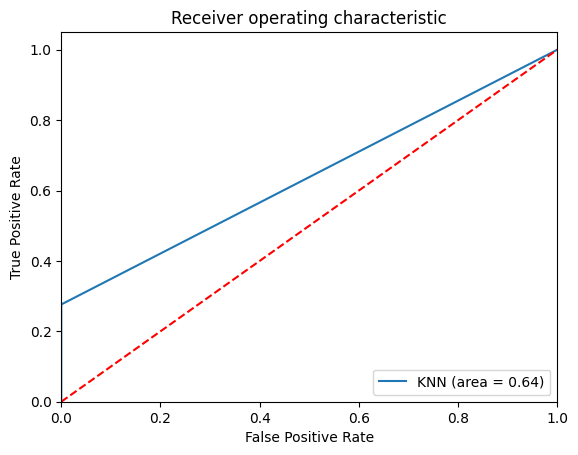

In [ ]:
knn_roc_auc = roc_auc_score(y_test,prediction_knn)
fpr, tpr, thresholds = roc_curve(y_test,prediction_knn)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=50)
model.fit(features_train,y_train)

DecisionTreeClassifier(random_state=50)

In [ ]:
# Predicting
y_pred_dt = model.predict(features_test)

In [ ]:
# Evaluating
cm = confusion_matrix(y_test, y_pred_dt)

print(cm)

[[1432   12]
 [  71  157]]


In [ ]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(y_test, model.predict(features_test)))
print (classification_report(y_test, model.predict(features_test)))

Accuracy : 0.95036 


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1444
           1       0.93      0.69      0.79       228

    accuracy                           0.95      1672
   macro avg       0.94      0.84      0.88      1672
weighted avg       0.95      0.95      0.95      1672



## Final Result based on Accuracy

* Decision Tree : 95.39%
* KNN classifier : 90.43%
* Multinomial Naive Bayes:95.09%    